# PRAKTIKUM BIG DATA ANALYTICS - PERTEMUAN 7 (DATA PREPROCESSING)

### TUJUAN:
Mampu memahami dan mengimplementasikan beberapa Teknik Data Preprocessing yaitu Case Folding, Filtering(Punctuation), Tokenizing, Stemming

## PRAKTIK

### 1. Tahap preprocessing untuk data kosong
- Ambil data yang yang ada di modul 3 (insurance.csv dan data3 csv)
- Tampilkan 20 data insurance.csv dan semua data3.csv

In [3]:
#Preprocessing untuk missing value
import pandas as pd
import numpy as np

data_olah = 'insurance.csv'
dataset = pd.read_csv(data_olah)
dataset.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,NaN,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
5,31,female,NaN,0.0,no,southeast,3756.62160
6,46,female,33.440,1.0,no,NaN,8240.58960
7,37,female,27.740,3.0,no,northwest,7281.50560
8,37,male,29.830,2.0,no,NaN,6406.41070
9,60,female,25.840,0.0,no,northwest,28923.13692


Data pada insurance diatas terdapat missing value (data kosong) yang ditandai dengan `NaN` pada beberapa kolom/atribut/field. Data ini akan menjadi masalah besar dalam pengolahan data apabila jumlah missing data banyak sekali.

### 2. Sebelum dilakukan pengolahan data sebaiknya dilakukan pengecekan data missing value pada dataset yang kita miliki dengan coding dan output sebagai berikut :

In [4]:
dataset.isnull().sum()

age         0
sex         1
bmi         1
children    1
smoker      0
region      2
charges     0
dtype: int64

Dari output menunjukkan bahwa pada kolom sex, bmi, children masing-masing terdapat data missing value dan pada kolom region terdapat 2 kolom data missing value.

Memanggil dataset dengan nama data3.csv

In [7]:
datamiss = 'data3.csv'
data = pd.read_csv(datamiss)
data

,Nilai UTS,Nilai UAS
0,80.0,87.0
1,78.0,81.0
2,72.0,7.0
3,68.0,65.0
4,78.0,9.0
5,NaN,78.0
6,90.0,87.0
7,76.0,78.0
8,73.0,81.0
9,66.0,88.0


Untuk cek missing value

In [9]:
#checking missing value
data.isnull().sum()

Nilai UTS     1
 Nilai UAS    1
dtype: int64

### 3. Memberi tanda untuk data missing value → memudahkan kita melihat data kosong

In [10]:
data.fillna('#')

,Nilai UTS,Nilai UAS
0,80.0,87.0
1,78.0,81.0
2,72.0,7.0
3,68.0,65.0
4,78.0,9.0
5,#,78.0
6,90.0,87.0
7,76.0,78.0
8,73.0,81.0
9,66.0,88.0


### 4. Membuat dataset baru

In [11]:
import pandas as pd
import numpy as np

# Create dataset
dataset = {"Nama" : ["Rafi", "Laras", "Yuli", "Widi", "Antok", "Gempa", "Agus"],
           "Berat" : [75, 65, np.nan, 73, 82, 90, np.nan ],
           "Tinggi" : [170, 184, 178, np.nan, 173, 180, 168]}

# Convert dictionary to dataframe
df = pd.DataFrame(dataset)
df

,Nama,Berat,Tinggi
0,Rafi,75.0,170.0
1,Laras,65.0,184.0
2,Yuli,NaN,178.0
3,Widi,73.0,NaN
4,Antok,82.0,173.0
5,Gempa,90.0,180.0
6,Agus,NaN,168.0


Data yang “ Null” atau “NaN” dalam proses pengolahan data akan menjadi masalah apabila jumlahnya terlalu besar. Untuk mengatasi hal ini dalam tahap preprocessing: data → data-data kosong dapat diisi dengan nilai estimasi (ukuran pusat data) misalkan nilai rata-rata.

In [12]:
df['Berat'] = df['Berat'].fillna(df['Berat'].mean())
df

,Nama,Berat,Tinggi
0,Rafi,75.0,170.0
1,Laras,65.0,184.0
2,Yuli,77.0,178.0
3,Widi,73.0,NaN
4,Antok,82.0,173.0
5,Gempa,90.0,180.0
6,Agus,77.0,168.0


Lihat data ke 2 dan ke 6 → nilai yang awalnya “Nan” diganti dengan nilai rata-rata pada variable Berat.

Lakukan untuk variabel Tinggi dengan nilai rata-rata juga !

In [13]:
df['Tinggi'] = df['Tinggi'].fillna(df['Tinggi'].mean())
df

,Nama,Berat,Tinggi
0,Rafi,75.0,170.0
1,Laras,65.0,184.0
2,Yuli,77.0,178.0
3,Widi,73.0,175.5
4,Antok,82.0,173.0
5,Gempa,90.0,180.0
6,Agus,77.0,168.0


### 5. Implementasi Case Folding, Filtering, Tokenize dan Stemming. Ketiklah perintah seperti berikut

In [18]:
# Melihat Tahapan Preprocessing Text

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

k = "JKN-KIS menanggung perawatan penyakit Orang Dengan Gangguan Jiwa, agar tidak tercipta Joker lainnya :"
print('kalimat asli')
print(k)
print()

"""
Tahapan Preprocessing
    Case Folding
    Filtering
    Stemming -> dapat referensi opsional karena menambah kinerja server
    Tokenize
    Stopword Removal
    
"""
case_folding = k.lower()
print("Case Folding : ")
print(case_folding)
print()
fil = case_folding.translate(str.maketrans("","",string.punctuation))
print("Filtering")
print(fil)
print()
print("Stemming")
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemm = stemmer.stem(fil)
print(stemm)
print()
tokens = word_tokenize(stemm)
print("Tokenize")
print(tokens)

stopword = set(stopwords.words('indonesian'))

removed = []
for t in tokens:
    if t not in stopword:
        removed.append(t)
print()
print('stopwords removal')
print(removed)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


kalimat asli
JKN-KIS menanggung perawatan penyakit Orang Dengan Gangguan Jiwa, agar tidak tercipta Joker lainnya :

Case Folding : 
jkn-kis menanggung perawatan penyakit orang dengan gangguan jiwa, agar tidak tercipta joker lainnya :

Filtering
jknkis menanggung perawatan penyakit orang dengan gangguan jiwa agar tidak tercipta joker lainnya 

Stemming
jknkis tanggung awat sakit orang dengan ganggu jiwa agar tidak cipta joker lain

Tokenize
['jknkis', 'tanggung', 'awat', 'sakit', 'orang', 'dengan', 'ganggu', 'jiwa', 'agar', 'tidak', 'cipta', 'joker', 'lain']

stopwords removal
['jknkis', 'tanggung', 'awat', 'sakit', 'orang', 'ganggu', 'jiwa', 'cipta', 'joker']


Penjelasan maksud dan fungsi method-method yang digunakan dalam laporan:
- **Case Folding** = mengonversi keseluruhan teks dalam dokumen menjadi suatu bentuk standar (biasanya huruf kecil atau lowercase)
- **Filtering** = mengambil kata-kata penting dari hasil token. Bisa menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting)
- **Stemming** = memperkecil jumlah indeks yang berbeda dari suatu dokumen dan juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk atau form yang berbeda karena mendapatkan imbuhan yang berbeda
- **Tokenizing** = tahap pemotongan string input berdasarkan tiap kata yang menyusunnya. Tokenisasi secara garis besar memecah sekumpulan karakter dalam suatu teks ke dalam satuan kata.

## LATIHAN

### 1. Bukalah salah satu link portal berita.
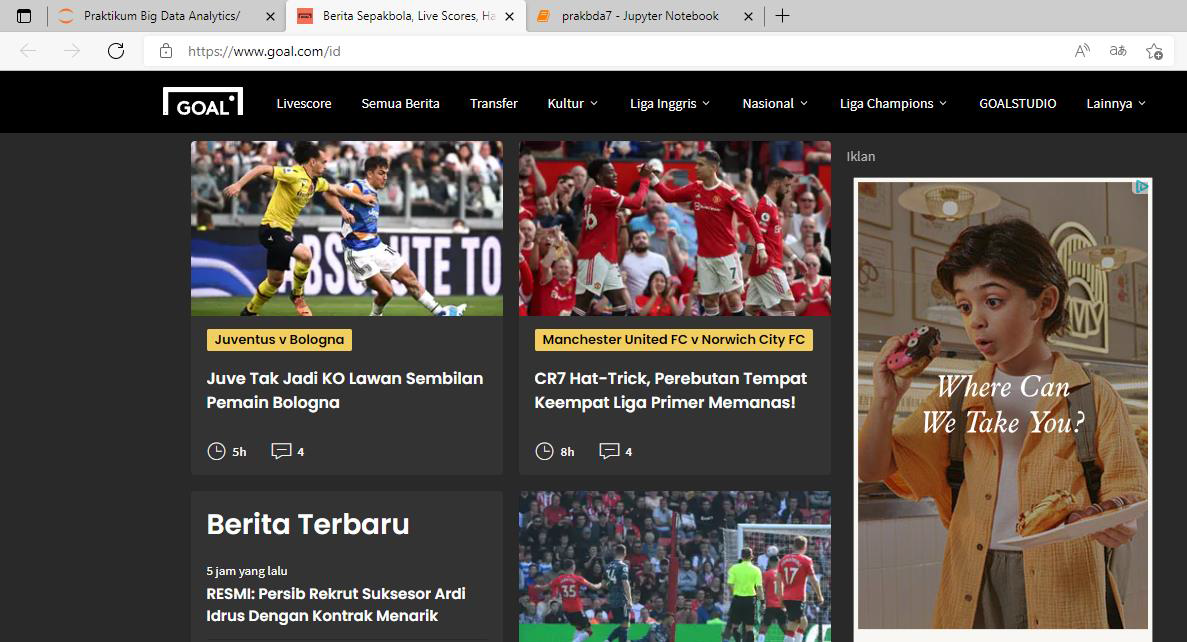

### 2. Pilih berita yang ingin anda lihat. Kemudian ambil salah satu bagian paragraph dari berita tersebut.
https://www.goal.com/id/berita/manchester-united-cristiano-ronaldo-norwich-city-liga-primer/blt7de15684003458bd
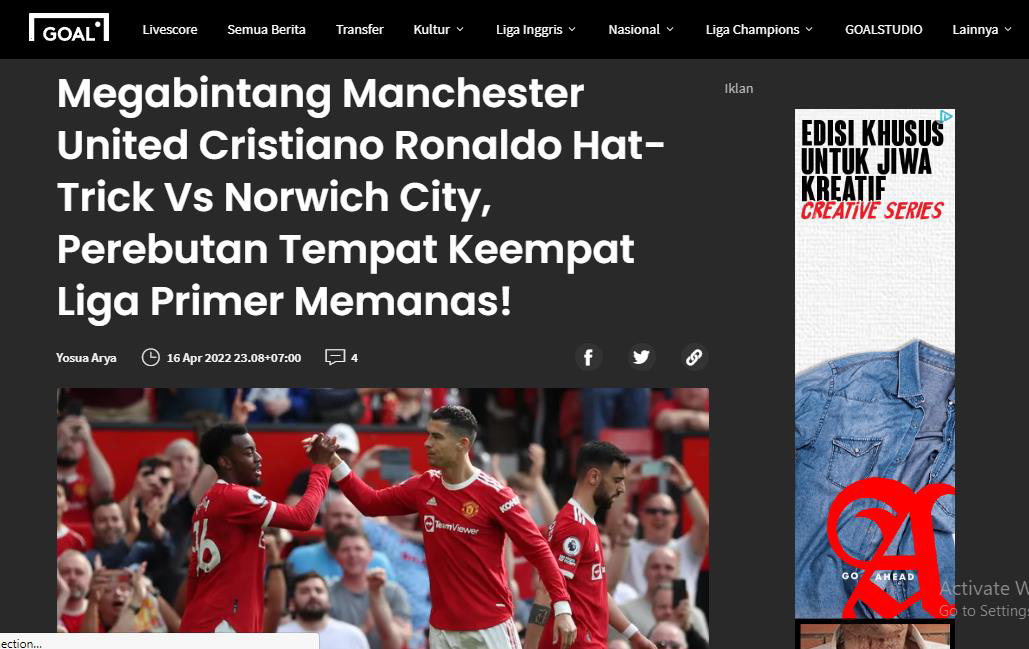

Paragraf yang dipilih:
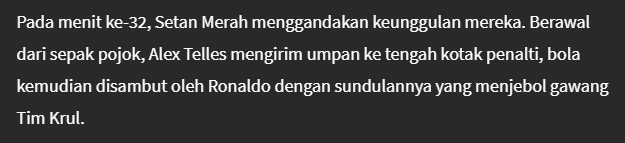

### 3. Lakukan Case Folding, Filtering, Tokenize dan Stemming pada paragraph tersebut.

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

k = "Pada menit ke-32, Setan Merah menggandakan keunggulan mereka. Berawal dari sepak pojok, Alex Telles mengirim umpan ke tengah kotak penalti, bola kemudian disambut oleh Ronaldo dengan sundulannya yang menjebol gawang Tim Krul."
print('Kalimat asli')
print(k)
print()

case_folding = k.lower()
print("Case Folding : ")
print(case_folding)
print()
fil = case_folding.translate(str.maketrans("","",string.punctuation))
print("Filtering : ")
print(fil)
print()
print("Stemming : ")
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemm = stemmer.stem(fil)
print(stemm)
print()
tokens = word_tokenize(stemm)
print("Tokenize : ")
print(tokens)

stopword = set(stopwords.words('indonesian'))

removed = []
for t in tokens:
    if t not in stopword:
        removed.append(t)
print()
print('stopwords removal')
print(removed)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Kalimat asli
Pada menit ke-32, Setan Merah menggandakan keunggulan mereka. Berawal dari sepak pojok, Alex Telles mengirim umpan ke tengah kotak penalti, bola kemudian disambut oleh Ronaldo dengan sundulannya yang menjebol gawang Tim Krul.

Case Folding : 
pada menit ke-32, setan merah menggandakan keunggulan mereka. berawal dari sepak pojok, alex telles mengirim umpan ke tengah kotak penalti, bola kemudian disambut oleh ronaldo dengan sundulannya yang menjebol gawang tim krul.

Filtering : 
pada menit ke32 setan merah menggandakan keunggulan mereka berawal dari sepak pojok alex telles mengirim umpan ke tengah kotak penalti bola kemudian disambut oleh ronaldo dengan sundulannya yang menjebol gawang tim krul

Stemming : 
pada menit ke32 setan merah ganda unggul mereka awal dari sepak pojok alex telles kirim umpan ke tengah kotak penalti bola kemudian sambut oleh ronaldo dengan sundul yang jebol gawang tim krul

Tokenize : 
['pada', 'menit', 'ke32', 'setan', 'merah', 'ganda', 'unggul', 'm

Pada latihan ini, kita menggunakan paragraf yang didapatkan dari salah satu berita pada website https://www.goal.com/id. Hal pertama yang kita lakukan adalah mencetak kalimat asli yang didapatkan. Lalu, kita lakukan case folding untuk membuat seluruh huruf pada kalimat menjadi lowercase dengan `case_folding = k.lower()`. Kemudian kita lakukan filtering untuk menghilangkan tanda baca dengan `fil = case_folding.translate(str.maketrans("","",string.punctuation))`. Selanjutnya kita lakukan stemming untuk membuat seluruh kata menjadi kata dasar sehingga nanti bisa langsung dilakukan tokenizing. Lalu langsung dilanjutkan dengan proses tokenizing pemotongan string berdasarkan tiap kata penyusun. Terakhir, kita buang kata kurang penting pada tokenizing tadi dengan stopwords removal filtering.

## TUGAS

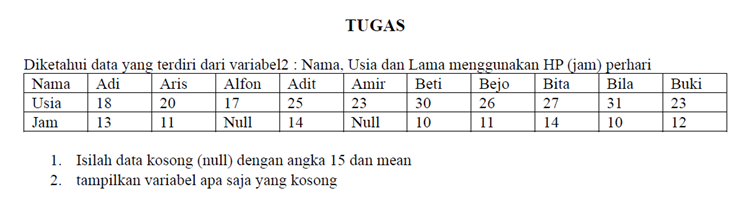

### _Langkah - Langkah menampilkan variabel yang kosong:_

### 1. Buat dataset baru, kemudian convert ke dataframe untuk menampilkan semua data termasuk data null.

In [33]:
import pandas as pd
import numpy as np

datauser = {"Nama" : ["Adi", "Aris", "Alfon", "Adit", "Amir", "Beti", "Bejo", "Bita", "Bila", "Buki"],
           "Usia" : [18, 20, 17, 25, 23, 30, 26, 27, 31, 23 ],
           "Jam" : [13, 11, np.nan, 14, np.nan, 10, 11, 14, 10, 12]}

df = pd.DataFrame(datauser)
df

,Nama,Usia,Jam
0,Adi,18,13.0
1,Aris,20,11.0
2,Alfon,17,NaN
3,Adit,25,14.0
4,Amir,23,NaN
5,Beti,30,10.0
6,Bejo,26,11.0
7,Bita,27,14.0
8,Bila,31,10.0
9,Buki,23,12.0


### 2. Kita beri tanda untuk missing value untuk memudahkan dalam melihat data yang kosong

In [34]:
df.fillna('#')

,Nama,Usia,Jam
0,Adi,18,13.0
1,Aris,20,11.0
2,Alfon,17,#
3,Adit,25,14.0
4,Amir,23,#
5,Beti,30,10.0
6,Bejo,26,11.0
7,Bita,27,14.0
8,Bila,31,10.0
9,Buki,23,12.0


### 3. Cek missing value

In [35]:
df.isnull().sum()

Nama    0
Usia    0
Jam     2
dtype: int64

### _Langkah-langkah mengisi data kosong (null) dengan angka 15 dan mean:_

### 1. Kita gunakan fungsi iloc untuk mengarahkan target ke data null pertama di dataset tersebut, kemudian kita replace NaN dengan angka 15

In [36]:
df.iloc[1:4, :] = df.iloc[1:4, :].fillna(15)
df

,Nama,Usia,Jam
0,Adi,18,13.0
1,Aris,20,11.0
2,Alfon,17,15.0
3,Adit,25,14.0
4,Amir,23,NaN
5,Beti,30,10.0
6,Bejo,26,11.0
7,Bita,27,14.0
8,Bila,31,10.0
9,Buki,23,12.0


`iloc()` adalah sebuah fungsi indexer untuk Pandas Dataframe yang digunakan untuk seleksi atau indexing berbasis lokasi integer berdasarkan posisi data. Pada kasus ini kita gunakan 1:4 karena data target berada di antara data 1 dari depan dan 4 dari belakang ( 0, 1, TARGET, 4, 5, 6, 7 , 8, 9, 10)

### 2. Gunakan fungsi fillna dan mean untuk mengisi data NaN berikutnya dengan hasil perhitungan rata-rata

In [37]:
df['Jam'] = df['Jam'].fillna(df['Jam'].mean())
df

,Nama,Usia,Jam
0,Adi,18,13.000000
1,Aris,20,11.000000
2,Alfon,17,15.000000
3,Adit,25,14.000000
4,Amir,23,12.222222
5,Beti,30,10.000000
6,Bejo,26,11.000000
7,Bita,27,14.000000
8,Bila,31,10.000000
9,Buki,23,12.000000
